<a href="https://colab.research.google.com/github/Soester10/Minority-Class-Upsampler-for-NLP/blob/main/Handling_Imbalanced_Dataset_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HANDLING IMBALANCED DATASET : Oversampling Function**

In [ ]:
#enter the column name that contains the classes
class_column = ''

#enter the column name that contains the text
text_column = ''

#set min size for your dataset
min_size = None

In [ ]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#!pip uninstall googletrans
!pip install googletrans==3.1.0a0
from googletrans import Translator
tr = Translator()

     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 35.2 MB/s 
     |████████████████████████████████| 65 kB 2.8 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=c12e2db38bbe8b316b05b532c72a4f60cd3e47b255f7a3af673d84ea7cbdd50c
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from tqdm import tqdm

In [ ]:
def oversample1(content):
    languages = ['es', 'fr', 'ja']
    #translation
    random_lan = random.randint(0, len(languages)-1)
    translation = tr.translate(str(content), languages[random_lan]).text
    translation = tr.translate(translation, 'en').text
    content = translation
    return content

def oversample2(content):
    #synonyms
    words = content.split()
    for word in range(len(words)):
        synonyms = wordnet.synsets(str(word))
        synonyms = [j.name() for i in synonyms for j in i.lemmas()]
        synonyms = list(set(synonyms))
        if len(synonyms)<=4:
          continue
        
        random_syn = random.randint(0, len(synonyms)-1)
        words[word] = synonyms[random_syn]
    
    words = ' '.join(words)
    content = words
    return content

def to_handle_imbalance(df, min_size = 10000):
    class_count_values = dict(df[class_column].value_counts())
    for key,value in tqdm(zip(list(class_count_values.keys()), list(class_count_values.values()))):
        if value>=min_size:
            continue

        contents_to_add = []
        contents_len = lambda:sum([len(i) for i in contents_to_add])
        tqdm.pandas()
        divis = (min_size-value)//(value*2)
        if (min_size-value)%(value*2) > 0:
            divis+=1
        for divi in range(divis):
            diff = min_size-(value + contents_len())
            if value>=diff:
                count = diff
                start = random.randint(0, value-diff)
            else:
                count = value
                start = 0
            contents_to_add_list = list(df[df[class_column]==key][text_column][start:start+count].progress_apply(oversample1))
            contents_to_add.append([for c in contents_to_add_list if c])

            diff = min_size-(value + contents_len())
            if value>=diff:
                count = diff
                start = random.randint(0, value-diff)
            else:
                count = value
                start = 0
            contents_to_add_list = list(df[df[class_column]==key][text_column][start:start+count].progress_apply(oversample2))
            contents_to_add.append([for c in contents_to_add_list if c])
        
        for contents_to_add_list in contents_to_add:
            df_to_add = pd.DataFrame({class_column:[key]*len(contents_to_add_list), text_column:contents_to_add_list})
            df = df.append(df_to_add, ignore_index=True)

    return df

In [ ]:
df = to_handle_imbalance(df, min_size=min_size)

Streaming output truncated to the last 5000 lines.
100%|██████████| 562/562 [07:05<00:00,  1.32it/s]

0it [00:00, ?it/s]
9it [5:00:50, 2923.14s/it]
100%|██████████| 666/666 [08:21<00:00,  1.33it/s]

100%|██████████| 666/666 [00:01<00:00, 494.39it/s]

100%|██████████| 666/666 [08:15<00:00,  1.34it/s]

100%|██████████| 666/666 [00:01<00:00, 476.00it/s]

100%|██████████| 666/666 [08:16<00:00,  1.34it/s]

100%|██████████| 666/666 [00:01<00:00, 499.79it/s]

100%|██████████| 666/666 [08:11<00:00,  1.35it/s]

100%|██████████| 666/666 [00:01<00:00, 498.51it/s]

100%|██████████| 666/666 [08:21<00:00,  1.33it/s]

100%|██████████| 666/666 [00:01<00:00, 494.83it/s]

100%|██████████| 666/666 [08:28<00:00,  1.31it/s]

100%|██████████| 666/666 [00:01<00:00, 504.11it/s]

100%|██████████| 666/666 [08:26<00:00,  1.32it/s]

100%|██████████| 666/666 [00:01<00:00, 488.01it/s]

100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

0it [00:00, ?it/s]
10it [5:59:30, 2157.09s/it]


In [ ]:
#Data Frame Updation
df = df.drop_duplicates()

# **HANDLING IMBALANCED DATASET : With Example Datatset**

## **IMPORTING DEPENDENCIES**


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import re
import matplotlib.pyplot as plt
import random
from IPython.display import display

In [ ]:
import seaborn as sns
#import tensorflow_addons as tfa
import tensorflow_hub as hub
!pip install tensorflow_text
import tensorflow_text as text

     |████████████████████████████████| 4.3 MB 13.1 MB/s 


## **GETTING DATA**

In [ ]:
df = pd.read_csv('consumer_complaints.csv')
display(df.head())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


## **EXTRACTING NON-NULL DATA**

In [ ]:
series = pd.notnull(df['consumer_complaint_narrative'])
df = df[series]
display(df.head())

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137


## **PRE-PROCESSING I : EXTRACTING TRAINABLE COLUMNS AND COMBINING SIMILAR CLASSES**

In [ ]:
df.loc[df['product'] == "Credit reporting", "product"] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['product'] == "Credit card", "product"] = 'Credit card or prepaid card'
df.loc[df['product'] == "Payday loan", "product"] = 'Payday loan, title loan, or personal loan'
df.loc[df['product'] == "Virtual Currency", "product"] = 'Money transfer, virtual currency, or money service'

df = df.loc[df['product']!='Other financial service', ['product', 'consumer_complaint_narrative']]

display(df.head())

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


## **GETTING ALL ENGLISH STOPWORDS**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_ = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **PRE-PROCESSING II : CLEANING DATA**

In [ ]:
def pre_process(x):
    #to remove redacted values
    x = x.replace('X', '')
    x = x.lower()
    #to remove special and meaningless characters
    re_symbols = re.compile("[\.\(\)\/\\\{\}\[\]\@\,\;\"\'\|]")
    re_accept = re.compile("[^a-z ]")
    x = re_symbols.sub(' ', x)
    x = re_accept.sub('', x)
    #to remove stopwords
    x = ' '.join(a for a in x.split() if a not in stopwords_)
    return x

df = df.reset_index(drop=True)
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(pre_process)
display(df.head())

,product,consumer_complaint_narrative
0,Debt collection,claimed owe years despite proof payment sent c...
1,Consumer Loan,due inconsistencies amount owed told bank amou...
2,Mortgage,wages earned job decreased almost half knew tr...
3,Mortgage,open current mortgage chase bank chase reporti...
4,Mortgage,submitted time submitted complaint dealt rushm...


## **PRE-PROCESSING III : HANDLING IMBALANCED DATASET**

In [ ]:
#Distribution before handling
display(df['product'].value_counts())

Debt collection                                                                 17552
Mortgage                                                                        14919
Credit reporting, credit repair services, or other personal consumer reports    12526
Credit card or prepaid card                                                      7929
Bank account or service                                                          5711
Consumer Loan                                                                    3678
Student loan                                                                     2128
Prepaid card                                                                      861
Payday loan, title loan, or personal loan                                         726
Money transfers                                                                   666
Name: product, dtype: int64

In [ ]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#!pip uninstall googletrans
!pip install googletrans==3.1.0a0
from googletrans import Translator
tr = Translator()

     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 35.2 MB/s 
     |████████████████████████████████| 65 kB 2.8 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=c12e2db38bbe8b316b05b532c72a4f60cd3e47b255f7a3af673d84ea7cbdd50c
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from tqdm import tqdm
from numba import jit

In [ ]:
def oversample1(content):
    languages = ['es', 'fr', 'hi']
    #translation
    random_lan = random.randint(0, len(languages)-1)
    translation = tr.translate(str(content), languages[random_lan]).text
    translation = tr.translate(translation, 'en').text
    content = translation
    if [True for x in contents_to_add if content in x]:
        return
    return content

def oversample2(content):
    #synonyms
    words = content.split()
    ##IMP: can do keyword extraction to only replace imp keywords##
    for word in range(len(words)):
        synonyms = wordnet.synsets(str(word))
        synonyms = [j.name() for i in synonyms for j in i.lemmas()]
        synonyms = list(set(synonyms))
        if len(synonyms)<=4:
          continue
        
        random_syn = random.randint(0, len(synonyms)-1)
        words[word] = synonyms[random_syn]
    
    words = ' '.join(words)
    content = words
    if [True for x in contents_to_add if content in x]:
        return
    return content

def to_handle_imbalance(df, min_size = 10000):
    class_count_values = dict(df['product'].value_counts())
    for key,value in tqdm(zip(list(class_count_values.keys()), list(class_count_values.values()))):
        if value>=min_size:
            continue

        contents_to_add = []
        contents_len = lambda:sum([len(i) for i in contents_to_add])
        tqdm.pandas()
        divis = (min_size-value)//(value*2)
        if (min_size-value)%(value*2) > 0:
            divis+=1
        for divi in range(divis):
            diff = min_size-(value + contents_len())
            if value>=diff:
                count = diff
                start = random.randint(0, value-diff)
            else:
                count = value
                start = 0
            contents_to_add_list = list(df[df['product']==key]['consumer_complaint_narrative'][start:start+count].progress_apply(oversample1))
            contents_to_add.append([for c in contents_to_add_list if c])

            diff = min_size-(value + contents_len())
            if value>=diff:
                count = diff
                start = random.randint(0, value-diff)
            else:
                count = value
                start = 0
            contents_to_add_list = list(df[df['product']==key]['consumer_complaint_narrative'][start:start+count].progress_apply(oversample2))
            contents_to_add.append([for c in contents_to_add_list if c])
        
        for contents_to_add_list in contents_to_add:
            df_to_add = pd.DataFrame({'product':[key]*len(contents_to_add_list), 'consumer_complaint_narrative':contents_to_add_list})
            df = df.append(df_to_add, ignore_index=True)

    return df

In [ ]:
df2 = to_handle_imbalance(df, min_size=10000)

Streaming output truncated to the last 5000 lines.
100%|██████████| 562/562 [07:05<00:00,  1.32it/s]

0it [00:00, ?it/s]
9it [5:00:50, 2923.14s/it]
100%|██████████| 666/666 [08:21<00:00,  1.33it/s]

100%|██████████| 666/666 [00:01<00:00, 494.39it/s]

100%|██████████| 666/666 [08:15<00:00,  1.34it/s]

100%|██████████| 666/666 [00:01<00:00, 476.00it/s]

100%|██████████| 666/666 [08:16<00:00,  1.34it/s]

100%|██████████| 666/666 [00:01<00:00, 499.79it/s]

100%|██████████| 666/666 [08:11<00:00,  1.35it/s]

100%|██████████| 666/666 [00:01<00:00, 498.51it/s]

100%|██████████| 666/666 [08:21<00:00,  1.33it/s]

100%|██████████| 666/666 [00:01<00:00, 494.83it/s]

100%|██████████| 666/666 [08:28<00:00,  1.31it/s]

100%|██████████| 666/666 [00:01<00:00, 504.11it/s]

100%|██████████| 666/666 [08:26<00:00,  1.32it/s]

100%|██████████| 666/666 [00:01<00:00, 488.01it/s]

100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

0it [00:00, ?it/s]
10it [5:59:30, 2157.09s/it]


Distribution Before Balancing:


Debt collection                                                                 17552
Mortgage                                                                        14919
Credit reporting, credit repair services, or other personal consumer reports    12526
Credit card or prepaid card                                                      7929
Bank account or service                                                          5711
Consumer Loan                                                                    3678
Student loan                                                                     2128
Prepaid card                                                                      861
Payday loan, title loan, or personal loan                                         726
Money transfers                                                                   666
Name: product, dtype: int64

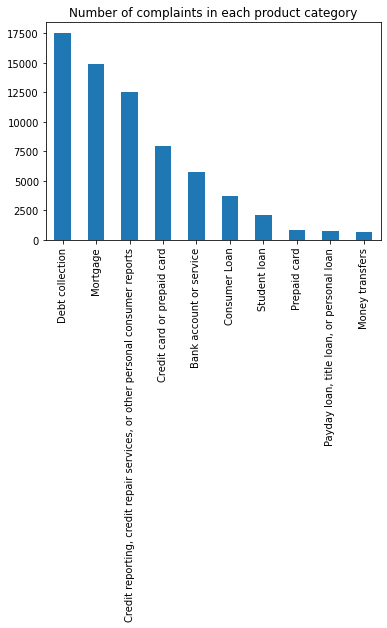

In [ ]:
#Distribution before Handling
print("Distribution Before Balancing:")
display(df['product'].value_counts())
df['product'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Number of complaints in each product category', y='Number of Complaints', rot=90)

Distribution After Balancing


Debt collection                                                                 17552
Mortgage                                                                        14919
Credit reporting, credit repair services, or other personal consumer reports    12526
Prepaid card                                                                    10000
Payday loan, title loan, or personal loan                                       10000
Credit card or prepaid card                                                     10000
Student loan                                                                    10000
Money transfers                                                                 10000
Consumer Loan                                                                   10000
Bank account or service                                                         10000
Name: product, dtype: int64

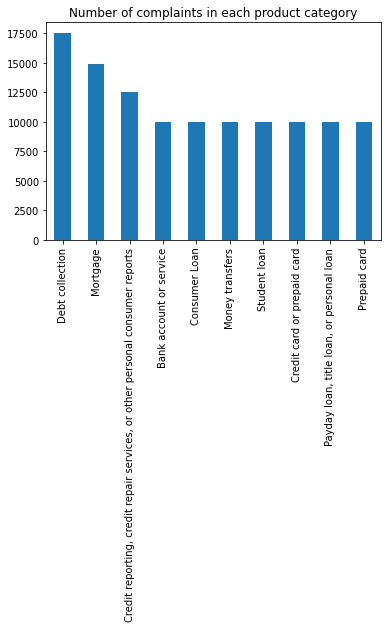

In [ ]:
#Distribution After Handling
print("Distribution After Balancing")
display(df2['product'].value_counts())
df2['product'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Number of complaints in each product category', y='Number of Complaints', rot=90)

In [ ]:
df3 = df2.drop_duplicates()

Debt collection                                                                 17050
Mortgage                                                                        14909
Credit reporting, credit repair services, or other personal consumer reports    11614
Credit card or prepaid card                                                      7992
Consumer Loan                                                                    6309
Student loan                                                                     5733
Bank account or service                                                          5675
Money transfers                                                                  5327
Prepaid card                                                                     5164
Payday loan, title loan, or personal loan                                        5081
Name: product, dtype: int64

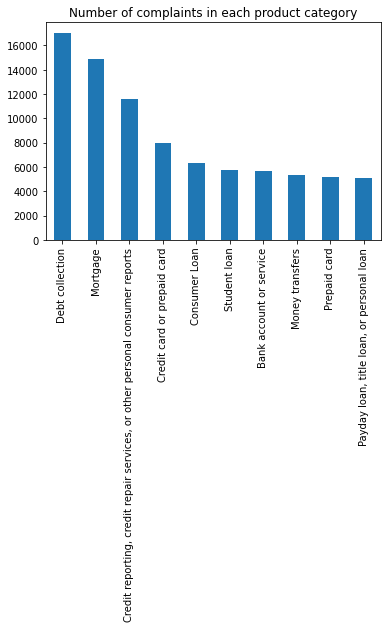

In [ ]:
display(df3['product'].value_counts())
df3['product'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Number of complaints in each product category', y='Number of Complaints', rot=90)

In [ ]:
#Data Frame Updation
df = df3